# Table of Contents
<a id="toc"></a>
- [1. Data Set and Project Description](#1)
- [2. Import Necssaries Libraries](#2)
- [3. EDA](#3)
- [4. Assign Features and Target Variables](#4)
- [5. Feature Scaling](#5)
- [6. Spliting the data into Training and Testing Data](#6)
- [7. Modeling](#7)
    - [7.1 Random Forest Regressor Model](#7.1)
    - [7.2 Gradient Boosting Regressor Model](#7.2)
    - [7.3 Bagging Regressor model](#7.3)
    - [7.4 Linear Regression Model](#7.4)
    - [7.5 SVR model](#7.5)
    - [7.6 Decision Tree Regressor](#7.6)
    - [7.7 XGBoost Regressor](#7.7)

<a>1. Data Set and Project Description </a>

# Import Necssaries Libraries

In [107]:
import pandas as pd
import numpy as np
import joblib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from autoviz.AutoViz_Class import AutoViz_Class
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from tpot import TPOTRegressor
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# EDA

In [62]:
data= 'gld_price_data.csv'
df = pd.read_csv('gld_price_data.csv')
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
df.shape

(2290, 6)

In [4]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [7]:
df.Date = df.Date.apply(pd.to_datetime)

In [8]:
df['Year'] = pd.DatetimeIndex(df['Date']).year # year column for extract some insights
df.head() 

,Date,SPX,GLD,USO,SLV,EUR/USD,Year
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692,2008
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491,2008
2,2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492,2008
3,2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299,2008
4,2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099,2008


In [9]:
df.groupby("Year").mean()

,SPX,GLD,USO,SLV,EUR/USD
Year,,,,,
2008,1208.337274,86.111148,77.528756,14.760708,1.464481
2009,945.604864,95.834464,34.145446,14.478527,1.393900
2010,1142.600627,119.966397,36.651847,19.922883,1.330050
2011,1268.544188,152.591486,37.781486,34.118063,1.389480
2012,1378.354519,162.151507,35.541598,30.349772,1.287449
2013,1642.193891,136.853213,35.014751,23.179909,1.329559
2014,1930.589375,121.721294,33.887277,18.276295,1.327894
2015,2061.795563,111.165561,16.527623,14.999596,1.109867
2016,2091.121803,118.780634,10.474525,16.161176,1.105778


# SPX

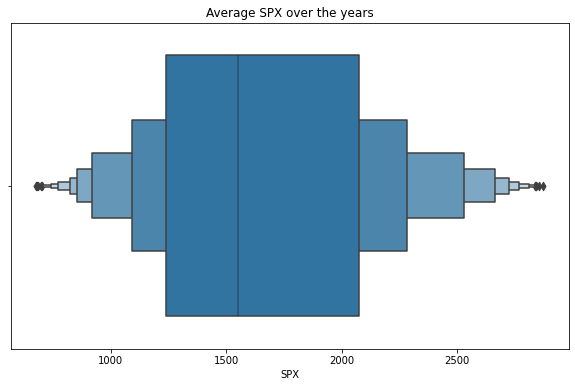

In [16]:
plt.figure(figsize=(10,6))
plt.title('Average SPX over the years')
sns.boxenplot(x='SPX', data=df);

## EUR price

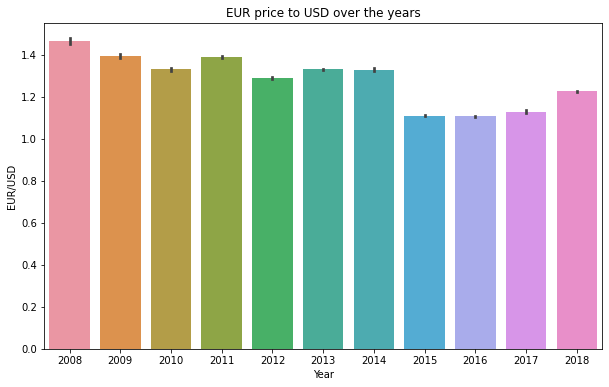

In [42]:
plt.figure(figsize=(10,6))
plt.title('EUR price to USD over the years')
sns.barplot(x='Year', y='EUR/USD', data=df);

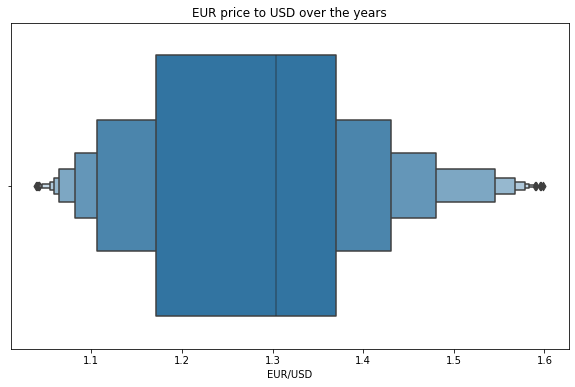

In [43]:
plt.figure(figsize=(10,6))
plt.title('EUR price to USD over the years')
sns.boxenplot(x="EUR/USD", data=df);

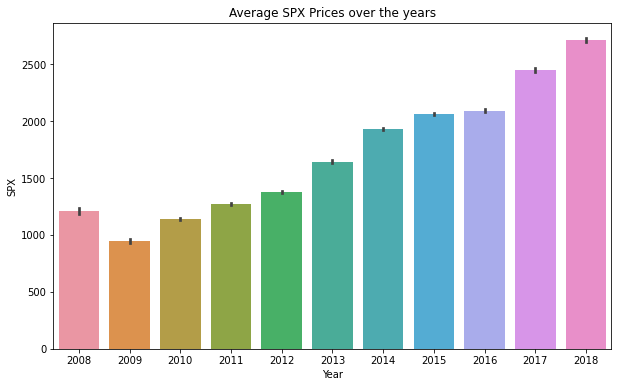

In [44]:
plt.figure(figsize=(10,6))
plt.title('Average SPX Prices over the years')
sns.barplot(x='Year', y='SPX', data=df);

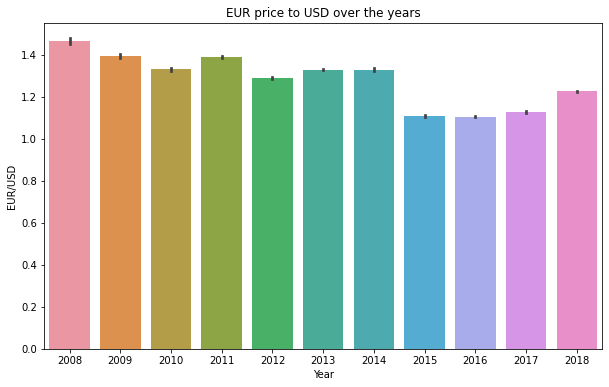

In [45]:
plt.figure(figsize=(10,6))
plt.title('EUR price to USD over the years')
sns.barplot(x='Year', y='EUR/USD', data=df);

# Selver 

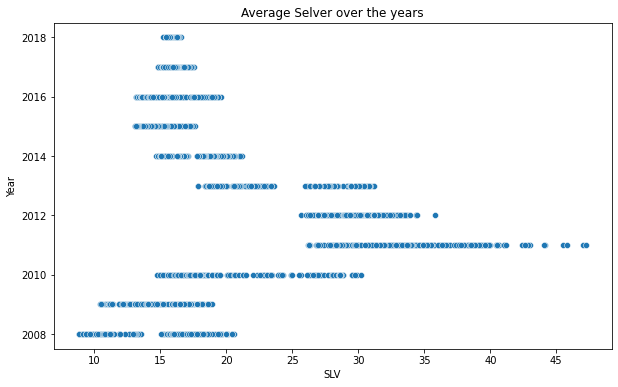

In [46]:
plt.figure(figsize=(10,6))
plt.title('Average Selver over the years')
sns.scatterplot(x='SLV', y="Year", data=df);

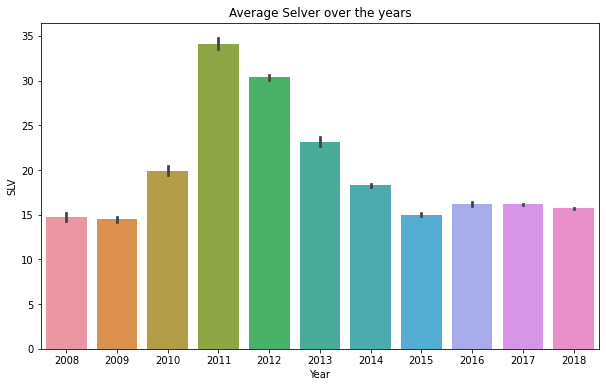

In [47]:
plt.figure(figsize=(10,6))
plt.title('Average Selver over the years')
sns.barplot(x='Year', y="SLV", data=df);

# Gold 

In [48]:
df.GLD.max()

184.589996

In [49]:
df.GLD.min()

70.0

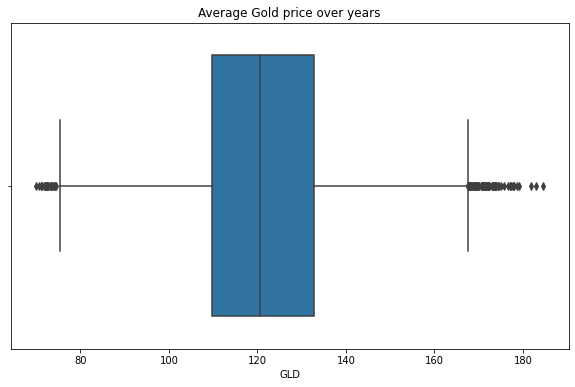

In [50]:
plt.figure(figsize=(10,6))
plt.title('Average Gold price over years')
sns.boxplot(x='GLD', data=df);

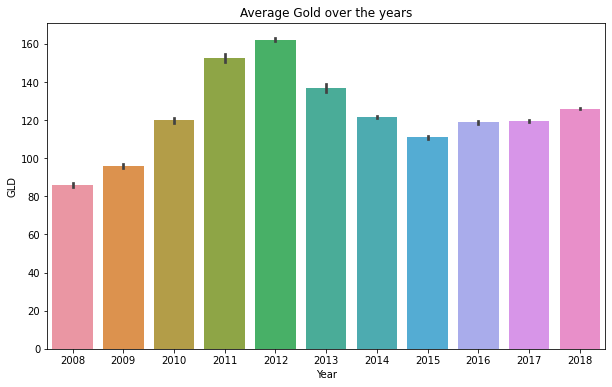

In [51]:
plt.figure(figsize=(10,6))
plt.title('Average Gold over the years')
sns.barplot(x='Year', y="GLD", data=df);

### We note that The price of gold reached its peak in 2012 and then continued to decline until 2018

<AxesSubplot:title={'center':'Heat map for continus variables including Target'}>

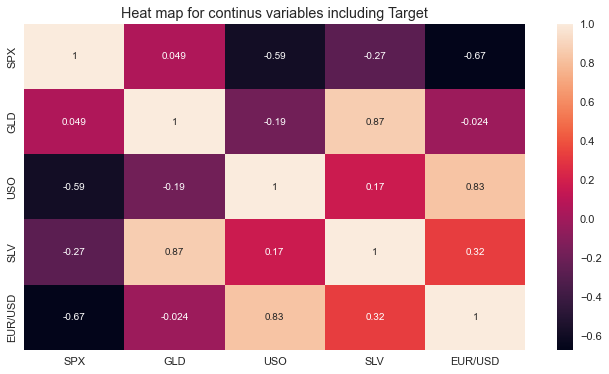

In [70]:
plt.figure(figsize=(10,6))
plt.title("Heat map for continus variables including Target")
sns.heatmap(df.corr(), annot=True)

##### Gold is highly Postivily correlated with Selver (87%)


### Relation between GLD & SLV

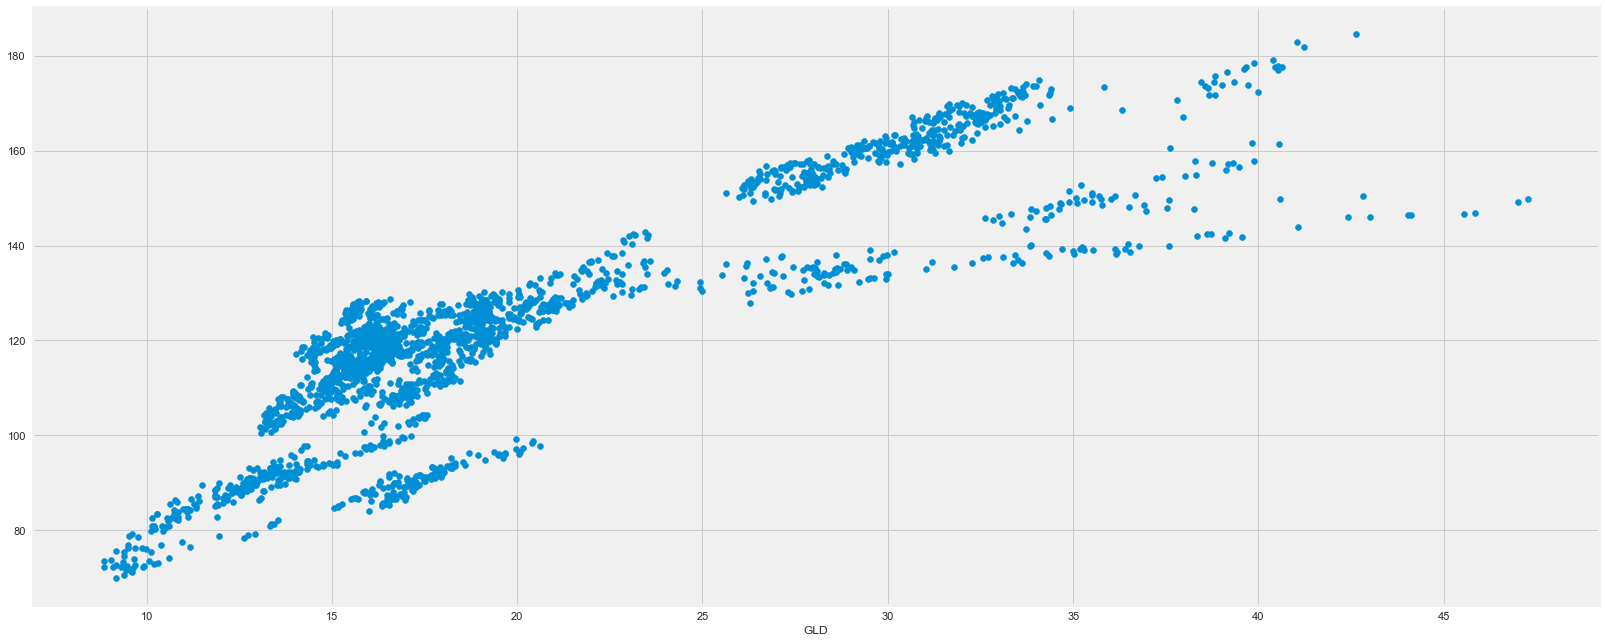

In [74]:
plt.figure(figsize=(25,11))
plt.xlabel("SLV")
plt.xlabel("GLD")
plt.scatter(df.SLV, df.GLD)
         

## summary of Visualization for all data

Shape of your Data Set loaded: (2290, 6)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    6 Predictors classified...
        1 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 15


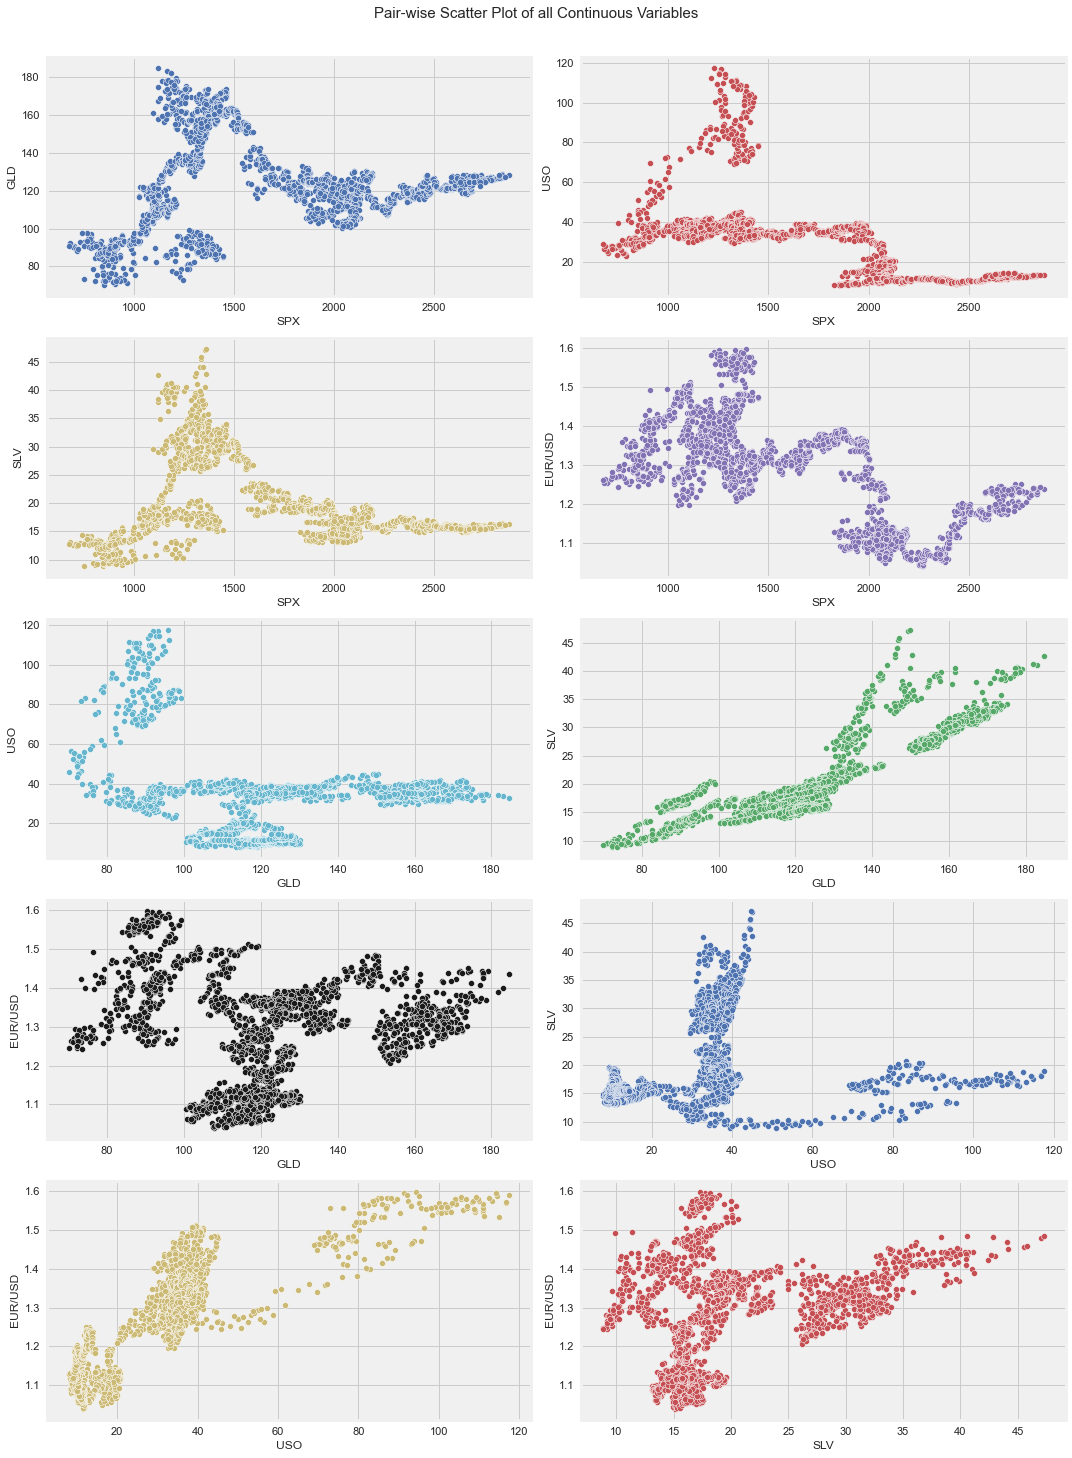

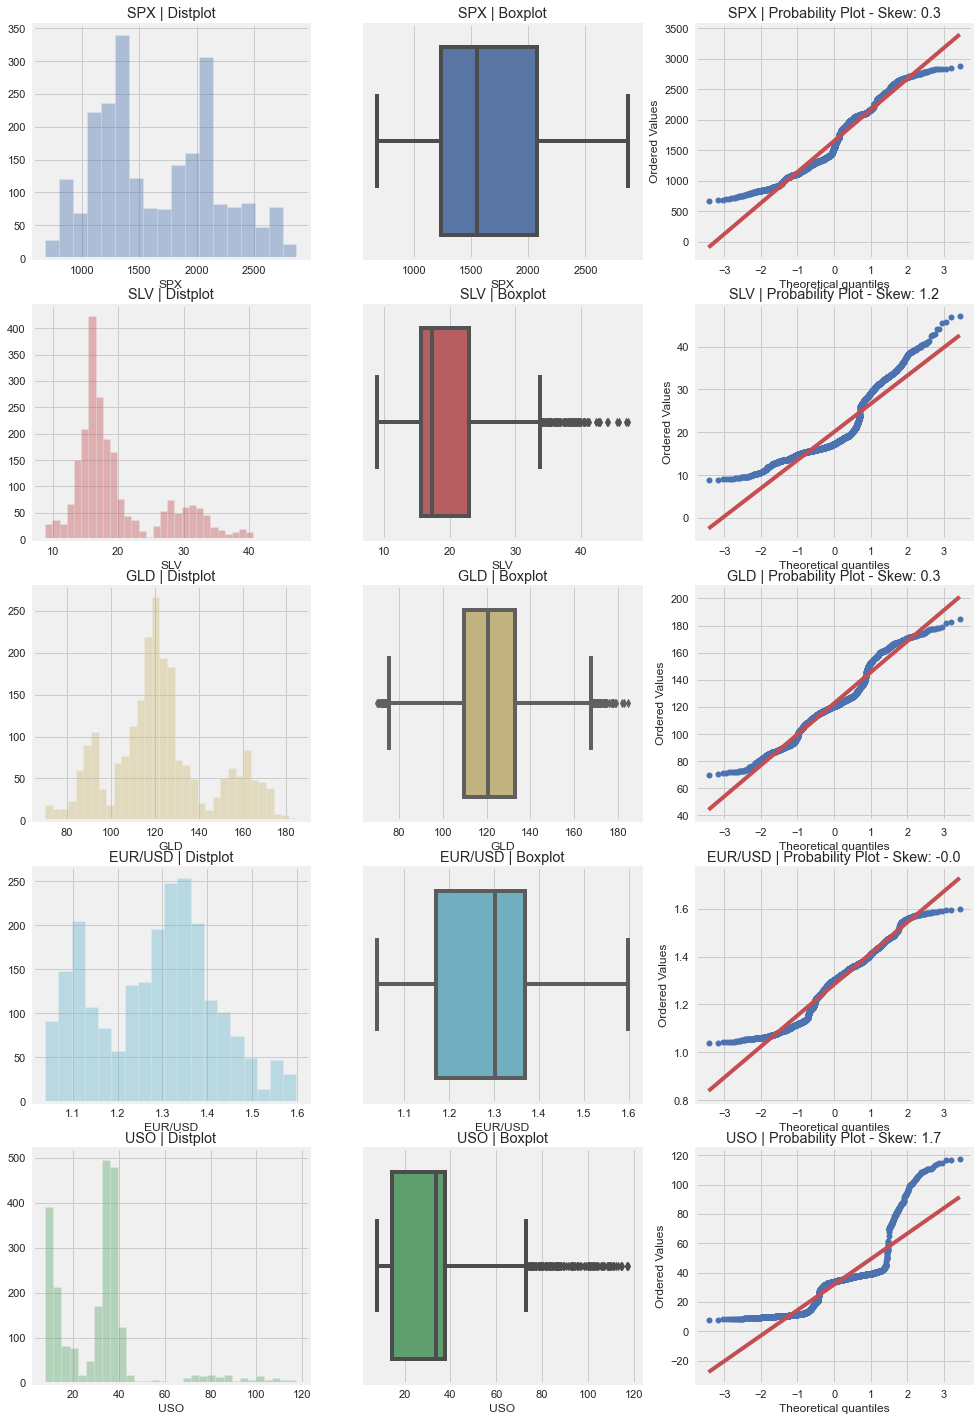

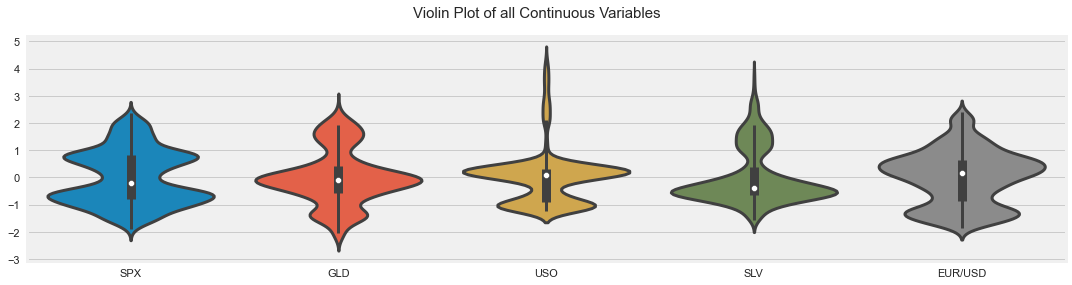

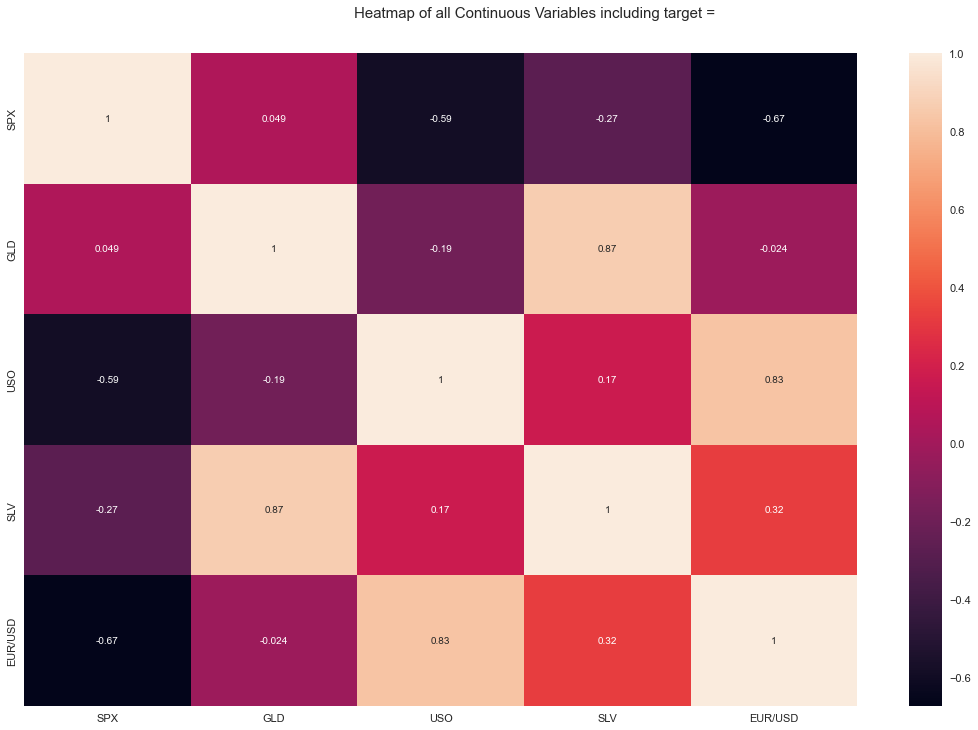

No categorical or numeric vars in data set. Hence no bar charts.
All Plots done
Time to run AutoViz = 9 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [63]:
AV = AutoViz_Class()
sep = ","
dft = AV.AutoViz(
    data,
    sep=",",
    depVar="",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
    save_plot_dir=None
)

# Assign Feature and Target variable

In [79]:
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [82]:
X = df.drop(['GLD', 'Date'], axis=1)
y = df.GLD
X.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [83]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

# Feature Scaling

In [85]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
X_scale[0]

array([-0.39914541,  2.38880956, -0.6917197 ,  1.42975293])

# Splitting the data into Training and Testing data

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X_scale,y, test_size=0.25, random_state=0)

In [89]:
print(f"Number of Training dataset: {len(X_train)}\nNumber of Testing dataset: {len(X_test)}")

Number of Training dataset: 1717
Number of Testing dataset: 573


# Modeling

In [92]:
def kfolds(model, model_name):
    model = cross_val_score(model, X,y, cv=10)
    model_score = np.average(model)
    print(f"{model_name} score on cross validation: {model_score * 100}%")

def train(model, model_name):
    model.fit(X_train, y_train)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    print(f"{model_name} model score on Training data: {model_train_score * 100}%\n{model_name} model score on Testing data: {model_test_score * 100}%")

def r2(model, model_name):
    score = r2_score(y_test, model.predict(X_test))
    print(f"R2 Score for {model_name} is {score * 100}%")
    
def save(model, model_name):
    joblib.dump(model, model_name)
    print("Model Saved Succesfully")

## Random Forest Regressor Model

In [93]:
rf_model = RandomForestRegressor()
kfolds(rf_model, "Random Forest")
train(rf_model, "Random Forest")

Random Forest score on cross validation: -107.78465348843451%
Random Forest model score on Training data: 99.82798693984863%
Random Forest model score on Testing data: 99.07954238760368%


In [94]:
r2(rf_model, "Random Forest")


R2 Score for Random Forest is 99.07954238760368%


## Gradient Boosting Regressor Model

In [96]:
gbr = GradientBoostingRegressor()
kfolds(gbr, "Gradient Boosting")
train(gbr, "Gradient Boosting")

Gradient Boosting score on cross validation: -100.48107081536286%
Gradient Boosting model score on Training data: 98.74244336209985%
Gradient Boosting model score on Testing data: 98.41060788578552%


In [97]:
r2(gbr, "Gradient Boosting")

R2 Score for Gradient Boosting is 98.41060788578552%


## Bagging Regressor Model

In [99]:
br = BaggingRegressor()
kfolds(br, "Bagging")
train(br, "Bagging")

Bagging score on cross validation: -136.17370676973977%
Bagging model score on Training data: 99.76290246651145%
Bagging model score on Testing data: 98.93071991561551%


In [100]:
r2(br, "Bagging")

R2 Score for Bagging is 98.93071991561551%


## Linear Regression model

In [102]:
lr = LinearRegression()
kfolds(lr, "Linear Regression")
train(lr, "Linear Regression")

Linear Regression score on cross validation: -227.1432149475829%
Linear Regression model score on Training data: 88.51829349434134%
Linear Regression model score on Testing data: 86.90802464545342%


In [103]:
r2(lr, "Linear Regression")

R2 Score for Linear Regression is 86.90802464545342%


### best Model score for Random Forest Regressor

# save the model 

In [108]:
save(rf_model, "Random Forest")

Model Saved Succesfully
